Graphs I generate:

1. Empty Grid Graph (NODATANEEDED)

  - Figure 1. Graphical representation of the final seconds of a college basketball (CBB) game.


2. Time Graph A (NODATANEEDED)

  - Figure 2. Joint behavior of the shot clock and game clock within the final seconds of a CBB game.

3. Time Graph B (NODATANEEDED)

  - Figure 3. Behavior of the shot clock when a foul occurs within the final seconds of a CBB game

4. SC=3 Graph (NODATANEEDED)

  - Figure 4. With less than 3 seconds left on the shot clock, fouls are likely to be deemed a shooting foul.


5. Distribution (ALL FOULS NEEDED)

  - Figure 5. Scatter plot for up 3 fouls from the 2010-2022 CBB seasons, scaled by frequency.


6. Probability of Fouling (REGULARSIM)

  - Figure 6. Percentage of fouling opportunities taken in the final seconds of a CBB game.


7. Equality Across Columns (NODATANEEDED)

  - Figure 7. Overtime-adjusted win percentages for a team that commits a foul in the final seconds of a CBB game.


8. Decreasing No Foul Win% (REGULARSIM)

  - Figure 8. Overtime-adjusted win percentages for a team that avoids fouling in the final seconds of a CBB game.

9. Recommended Strategy (REGULARSIM)

  - Figure 9. Recommended up 3 fouling strategy for the final seconds of a CBB game.


10. Table: Breakdown of Recommended Strategy



In [1]:
import warnings
warnings.filterwarnings('ignore')
%pip install --upgrade pip
%pip install sympy
%pip install pandas
%pip install numpy
%pip install gdown
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sympy import Plane, Point2D, Line2D,Polygon, Segment
import pandas
#This code creates a polygon for the last 21 seconds of the game clock
#x-axis corresponds with game clock times y-axis to shot clock times
#It also creates 13 lines that cut the polygon in such a way that
#generates the 34 two-dimensional cells of interest
origpolygon = Polygon([0, 0], [21, 0], [21,21], [0, 0])
line1 = Line2D([3,0],[3,3])
line2 = Line2D([6,0],[6,6])
line3 = Line2D([9,0],[9,9])
line4 = Line2D([12,0],[12,12])
line5 = Line2D([15,0],[15,15])
line6 = Line2D([18,0],[18,18])
line7 = Line2D([3,3],[21,3])
line8 = Line2D([3,0],[33,30])
line9 = Line2D([6,0],[36,30])
line10 = Line2D([9,0],[39 ,30])
line11 = Line2D([12,0],[42 ,30])
line12 = Line2D([15,0],[45 ,30])
line13 = Line2D([18,0],[48 ,30])

up3segments = [origpolygon]
gone_over = [None]
for i in range(3):
  for line in [line1,line2,line3,line4,line5, line6,line7,line8,
               line9,line10,line11,line12,line13]:
    for poli in up3segments:
      if ((poli,line) not in gone_over) and (poli!=None):
        try:
          segment = poli.cut_section(line)
          if None not in segment:
            up3segments.append(segment[0])
            up3segments.append(segment[1])
            up3segments.remove(poli)
          gone_over.append((poli,line))
        except:
          gone_over.append((poli,line))

In [ ]:
import numpy as np
import pandas as pd
import gdown
import warnings
warnings.filterwarnings('ignore')
##There are a maximum number of times the urls below can be accessed per 24 hours
##These urls correspond to the play by play data from the
##2009-10 and 2010-11 seasons, 2011-12 and 2012-13 seasons, 2013-14 seasons and 2014-15 seasons,
##2015-16 season, 2016-17 season, 2017-18 and 2018-19 seasons, 2019-20 and
##2020-21 and 2021-22 seasons of NCAA Division 1 Mens Basketball respectively.


urls = ['https://drive.google.com/file/d/1PxcGXvscaoaFPksHAabhLoIlxopsBUr3/view?usp=sharing',
        'https://drive.google.com/file/d/1qOgZ28TZTNUY4BjoeRZCnTGLUyTdDnIo/view?usp=sharing',
        'https://drive.google.com/file/d/1eUbCluRtm1NOZjSbQYR1EjkNs_hlR8pJ/view?usp=sharing',
        'https://drive.google.com/file/d/1_EELPYHrpTJVLJY_QkAESKa8w8EkPmzE/view?usp=sharing',
        'https://drive.google.com/file/d/1SC3yIfTWMp5Fe6lh-zzdssXFE3gFWY9e/view?usp=sharing',
        'https://drive.google.com/file/d/1k2mn1LQd2J1gA5f4vXlG62sxdDptD8HB/view?usp=sharing',
        'https://drive.google.com/file/d/152fSRK4ny7HD7so331YR2JzhPsjdXFEI/view?usp=sharing']

foullocs_sc=[]
foullocs_gc=[]

years = [2010,2012,2014,2016,2017,2018,2020] ##ordered years urls correspond to

##This analysis is time consuming and can take up to 9 hours to compute
##It was originally run in 14 different notebook files simultaneously, saving time.
##However, these files have been integrated to better display the analysis roadmap.
for u in range(len(urls)):
  url = urls[u]
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  pseudo_df = gdown.download(url, "current_pbp_file", quiet=False)
  pbp_data = pd.read_csv(pseudo_df)
  pbp_data['team_margin']=pbp_data['team_score']-pbp_data['opp_score']
  if u ==0:
    fouls_up3= pbp_data.loc[(pbp_data['TEAM_FOUL']=='yes')&(pbp_data['half']>1)&(pbp_data['secs_left_half']<22)&(pbp_data['team_margin']==3)].copy()
  else:
    curr_fouls_up3= pbp_data.loc[(pbp_data['TEAM_FOUL']=='yes')&(pbp_data['half']>1)&(pbp_data['secs_left_half']<22)&(pbp_data['team_margin']==3)].copy()
    fouls_up3 =pd.concat([fouls_up3,curr_fouls_up3], ignore_index=True)

foullocs_sc = list(fouls_up3['exp_sc'])
foullocs_gc = list(fouls_up3['secs_left_half'])




## 1.Empty Grid Graph (NODATANEEDED)

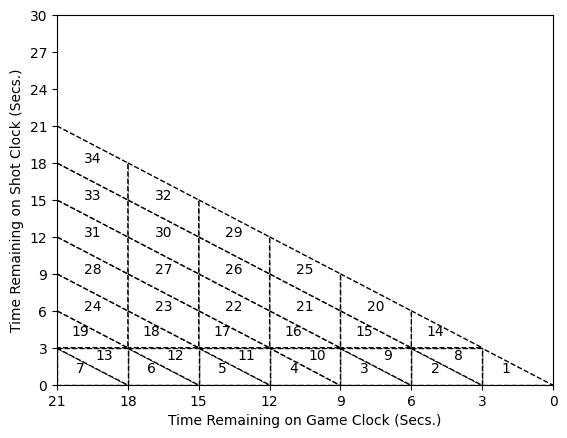

In [4]:
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
x = np.linspace(0, 21, 100)

maxx = 21

fig, ax = plt.subplots(1,1)
grouped=pd.DataFrame({'Strategy':[str(x) for x in up3segments]})
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)


grouped['Polygon No.'] = grouped.index+1
for idx, row in grouped.iterrows():
  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],horizontalalignment='center',size=10)

gp_count=0
gw_count=0
from matplotlib.patches import Polygon

for i in range(len(grouped.reset_index()['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
              replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('w')
  Polygon.set_color(poli,c='w')
  Polygon.set_edgecolor(poli,color='k')
  Polygon.set_linewidth(poli,w=1)
  Polygon.set_linestyle(poli,'--')
  Polygon.set_label(poli,s='')

  ax.add_patch(poli)
plt.ylim(0,30)
plt.xlim(0,maxx)
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])

ax=plt.gca() #inverts plot
ax.invert_xaxis()
plt.show()

## 2. Time Graph Regular Play (NODATANEEDED)

In [ ]:
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 21, 100)

maxx = 21

fig, ax = plt.subplots(1,1)
grouped=pd.DataFrame({'Strategy':[str(x) for x in up3segments]})
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)


grouped['Polygon No.'] = grouped.index+1
for idx, row in grouped.iterrows():
  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],horizontalalignment='center',size=10)

gp_count=0
gw_count=0
from matplotlib.patches import Polygon

for i in range(len(grouped.reset_index()['Strategy'])):
  if i in [0,1,2,3,4,5,6]:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('w')
    Polygon.set_color(poli,c='w')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_label(poli,s=str(i))
  else:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('k')
    Polygon.set_color(poli,c='k')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_label(poli,s=str(i))
    ax.set_facecolor('w')
  ax.add_patch(poli)
plt.plot(x,x-3)
plt.plot(x,x-6)
plt.plot(x,x-9)
plt.plot(x,x-12)
plt.plot(x,x-15)
plt.plot(x,x-18)
plt.ylim(0,30)
plt.xlim(0,maxx)

ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
plt.show()

## 3. Time Graph At Foul Moment (NODATANEEDED)

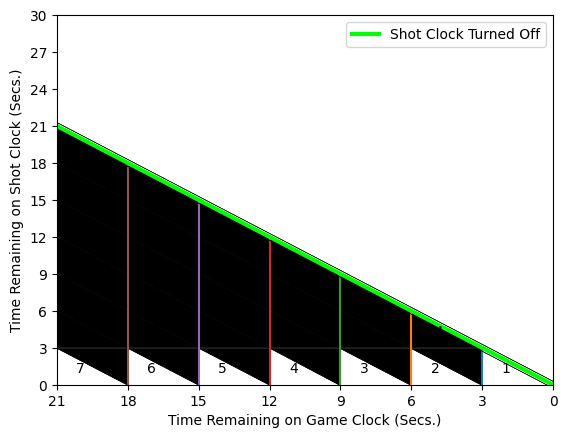

In [5]:
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 21, 100)

maxx = 21

fig, ax = plt.subplots(1,1)
grouped=pd.DataFrame({'Strategy':[str(x) for x in up3segments]})
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)


grouped['Polygon No.'] = grouped.index+1
for idx, row in grouped.iterrows():
  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],horizontalalignment='center',size=10)

gp_count=0
gw_count=0
from matplotlib.patches import Polygon

for i in range(len(grouped.reset_index()['Strategy'])):
  if i in [0,1,2,3,4,5,6]:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('w')
    Polygon.set_color(poli,c='w')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_label(poli,s='')
  else:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('k')
    Polygon.set_color(poli,c='k')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_label(poli,s='')
    ax.set_facecolor('w')
  ax.add_patch(poli)

plt.plot([3, 3],[0,3])
plt.plot([6, 6],[0,6])
plt.plot([9, 9],[0,9])
plt.plot([12, 12],[0,12])
plt.plot([15, 15],[0,15])
plt.plot([18, 18],[0,18])
plt.ylim(0,30)
plt.xlim(0,maxx)
plt.plot(x,x,'lime', linewidth=3,label="Shot Clock Turned Off")
plt.plot(x,x+0.28,'k', linewidth=.3)
plt.plot(x,x+0.28,'k', linewidth=.3)
plt.plot(x,x+0.28,'k', linewidth=.3)
plt.plot(x,x-0.28,'k', linewidth=.3)
plt.plot(x,x-0.28,'k', linewidth=.3)
plt.plot(x,x-0.28,'k', linewidth=.3)


ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
plt.legend()
ax=plt.gca() #inverts plot
ax.invert_xaxis()
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
plt.show()

## 4. SC=3 Graph (NODATANEEDED)

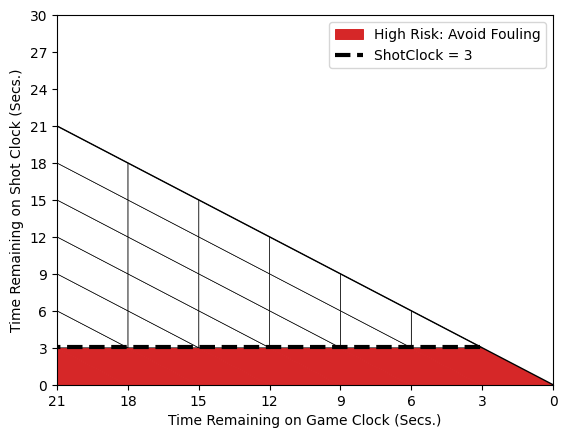

In [6]:
from matplotlib import markers
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.linspace(0, 22, 100)

maxx = 21

fig, ax = plt.subplots(1,1)
grouped=pd.DataFrame({'Strategy':[str(x) for x in up3segments]})
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)


grouped['Polygon No.'] = grouped.index+1
#for idx, row in grouped.iterrows():
#  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],horizontalalignment='center',size=10)

gp_count=0
gw_count=0
from matplotlib.patches import Polygon

for i in range(len(grouped.reset_index()['Strategy'])):
  if i > 12:
    pass
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('w')
    Polygon.set_color(poli,c='w')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_linestyle(poli,ls='-')
    #Polygon.set_label(poli,s=str(i))
  else:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('tab:red')
    Polygon.set_color(poli,c='tab:red')
    #Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.7)
    Polygon.set_label(poli,s="High Risk: Avoid Fouling")
  ax.add_patch(poli)
  ax.set_facecolor('w')
plt.plot(x+2.85,(x/x)+2.05,'k--',label="ShotClock = 3", linewidth=3,markersize=11)#
plt.plot(x,x,'k', linewidth=1)
plt.ylim(0,30)
plt.xlim(0,maxx)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
plt.show()

## 5. Distribution Graph (ALL FOULS NEEDED)

In [ ]:
from matplotlib import markers
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.linspace(0, 22, 100)

maxx = 21

fig, ax = plt.subplots(1,1)
grouped=pd.DataFrame({'Strategy':[str(x) for x in up3segments]})
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)


grouped['Polygon No.'] = grouped.index+1
#for idx, row in grouped.iterrows():
#  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],horizontalalignment='center',size=10)

gp_count=0
gw_count=0
from matplotlib.patches import Polygon
from collections import Counter
combos = list(zip(foullocs_gc*3, foullocs_sc*3))
weight_counter = Counter(combos)
weights = [weight_counter[(foullocs_gc[i],foullocs_sc[i])] for i, _ in enumerate(foullocs_gc)]

for i in range(len(grouped.reset_index()['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
              replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('tab:orange')
  Polygon.set_color(poli,c='tab:orange')
  Polygon.set_edgecolor(poli,color='k')
  Polygon.set_linewidth(poli,w=.5)
  Polygon.set_linestyle(poli,ls='-')
  ax.add_patch(poli)
  ax.set_facecolor('w')
plt.plot(x+2.85,(x/x)+2.05,'k--',label="ShotClock = 3", linewidth=3,markersize=11)#
plt.plot(x,x,'k', linewidth=1)
N = 1644
colors = np.random.sample(N)

plt.scatter(foullocs_gc,foullocs_sc, s=weights,c= colors,label='Frequency')
plt.ylim(0,30)
plt.xlim(0,maxx)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
plt.show()

## 6. Probability of Fouling (REGULARSIM)

<Figure size 640x480 with 0 Axes>

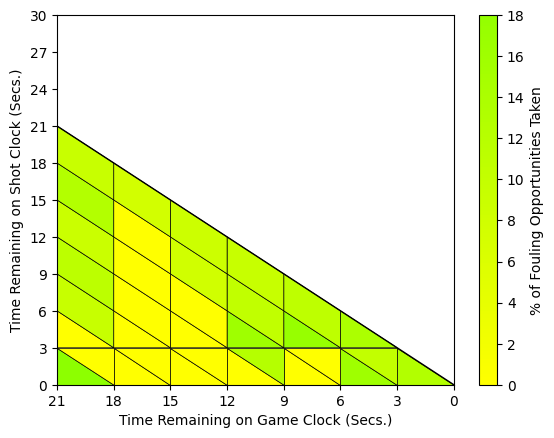

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
from matplotlib.colors import LinearSegmentedColormap


ptmargin=3
bonustype = 'double'
maxx = 21
restype ='orig'
folder ='StudyCalculations'

#restype ='rep'
#folder ='ReproducedCalculations'


reg_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2010_results.csv')
reg_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2012_results.csv')
reg_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2014_results.csv')
reg_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2016_results.csv')
reg_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2017_results.csv')
reg_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2018_results.csv')
reg_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2020_results.csv')
lv_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2010_results.csv')
lv_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2012_results.csv')
lv_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2014_results.csv')
lv_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2016_results.csv')
lv_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2017_results.csv')
lv_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2018_results.csv')
lv_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2020_results.csv')


##This code chunk joins all the above datasets and calculates win percentages associated with each approach.
reg_results = pd.concat([reg_res_2010,reg_res_2012,reg_res_2014,
                         reg_res_2016,reg_res_2017,reg_res_2018,reg_res_2020],ignore_index=True)
lv_results = pd.concat([lv_res_2010,lv_res_2012,lv_res_2014,lv_res_2016,
                         lv_res_2017, lv_res_2018, lv_res_2020],ignore_index=True)
reg_results['idx']=reg_results.index
lv_results['idx']=lv_results.index
results = reg_results.join(lv_results,on='idx', rsuffix=" LV")
grouped = results.groupby(['Strategy']).sum()
grouped['Win% LVFoul'] = (100*grouped['Games Won Foul LV']) / grouped['Games Played Foul LV']
grouped['Win% NoLVFoul'] =(100*grouped['Games Won NoFoul LV']) / grouped['Games Played NoFoul LV']
grouped['Win% RegFoul'] = (100*grouped['Games Won Foul']) / grouped['Games Played Foul']
grouped['Win% NoFoul'] =(100*grouped['Games Won NoFoul']) / grouped['Games Played NoFoul']
grouped.reset_index(inplace=True)
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)

grouped['Polygon No.'] = grouped.index+1
grouped['Min (GC)'] = grouped['Min (GC)'].astype(int)
gc_df = pd.DataFrame({'GC Games Played Foul':grouped.groupby(['Min (GC)'])['Games Played Foul'].sum(), 'GC Games Won Foul':grouped.groupby(['Min (GC)'])['Games Won Foul'].sum()})
gc_df.reset_index(inplace=True)
gc_grouped = pd.merge(gc_df,grouped,on=['Min (GC)']).copy()
gc_grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
gc_grouped.reset_index(inplace=True)
gc_grouped['GC Interval Win% RegFoul'] = gc_grouped['GC Games Won Foul'] / gc_grouped['GC Games Played Foul']
gc_grouped['Foul Probability']=gc_grouped['Games Played Foul'] / (gc_grouped['Games Played Foul'] + gc_grouped['Games Played NoFoul'])
##This code chunk graphs the recommended approaches for each interval.
##It compares the win percentages across all fouling decisions and
##colors the plain grid according to the best approach in each interval.
##Red = NO FOUL, Green=Foul+LaneViolation, White=NotEnoughData
from matplotlib.patches import Polygon
next_wp_nofoul = 10000
fig, ax = plt.subplots()
x = np.arange(0, 10)
y = np.arange(0,10)
X, Y = np.meshgrid(x, y)
Z = X+Y
#colors = [(1, 1, 1), (1-(0.175*4.5), 1-(0.175*2.5), 1)]  # R -> G -> B
colors = [(1, 1, 0), (1-(0.175**0.5),1,0)]  # R -> G -> B
cmap_name = 'my_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
#im = ax.imshow(Z, origin='lower', cmap=cmap)
fig.colorbar(im, ax=ax,label='% of Fouling Opportunities Taken')
im = ax.imshow(Z, origin='lower', cmap=cmap)
plt.clf()
fig, ax = plt.subplots()

#for idx, row in gc_grouped.iterrows():
#  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],
#                 horizontalalignment='center',size=10)
for i in range(len(gc_grouped['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
              replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('w')
  wp_lvfoul = gc_grouped['Win% LVFoul'].values[i]
  wp_regfoul = gc_grouped['Win% RegFoul'].values[i]
  wp_nofoul = gc_grouped['Win% NoFoul'].values[i]
  gp_lvfoul = gc_grouped['Games Played Foul LV'].values[i]
  gp_regfoul = gc_grouped['Games Played Foul'].values[i]
  gp_nofoul = gc_grouped['Games Played NoFoul'].values[i]
  wp_regfoul_gclevel=((gc_grouped['GC Interval Win% RegFoul']-0.8)*9.8).values[i]
  foul_prob=gc_grouped['Foul Probability'].values[i]
  #Polygon.set_color(poli,c=[1-4.5*foul_prob,1-2*foul_prob,1])
  Polygon.set_color(poli,c=[1-(foul_prob)**0.5,1,0])

  Polygon.set_edgecolor(poli,color='k')
  Polygon.set_linewidth(poli,w=.5)
  Polygon.set_linestyle(poli,ls='-')
  Polygon.set_label(poli,s=str(grouped['Min (GC)'][i])+'-'+str(grouped['Min (GC)'][i]+3)+": "+str(round(100*gc_grouped['Foul Probability'].values[i],1))+"%")
  ax.add_patch(poli)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(),loc='upper center',ncol=4,prop={'size': 8})


plt.plot([0,21],[0,21],'k', linewidth=1)

plt.ylim(0,30)
plt.xlim(0,maxx)
fig.colorbar(im, ax=ax,label='% of Fouling Opportunities Taken')
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
plt.show()

## 7. Equality Across Columns (REGULARSIM)

<Figure size 640x480 with 0 Axes>

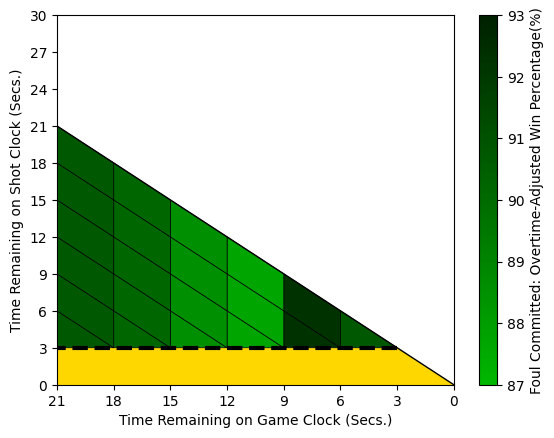

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
from matplotlib.colors import LinearSegmentedColormap


ptmargin=3
bonustype = 'double'
maxx = 21
restype ='orig'
folder ='StudyCalculations'

#restype ='rep'
#folder ='ReproducedCalculations'

reg_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2010_results.csv')
reg_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2012_results.csv')
reg_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2014_results.csv')
reg_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2016_results.csv')
reg_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2017_results.csv')
reg_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2018_results.csv')
reg_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2020_results.csv')
lv_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2010_results.csv')
lv_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2012_results.csv')
lv_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2014_results.csv')
lv_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2016_results.csv')
lv_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2017_results.csv')
lv_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2018_results.csv')
lv_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2020_results.csv')


##This code chunk joins all the above datasets and calculates win percentages associated with each approach.
reg_results = pd.concat([reg_res_2010,reg_res_2012,reg_res_2014,
                         reg_res_2016,reg_res_2017,reg_res_2018,reg_res_2020],ignore_index=True)
lv_results = pd.concat([lv_res_2010,lv_res_2012,lv_res_2014,lv_res_2016,
                         lv_res_2017, lv_res_2018, lv_res_2020],ignore_index=True)
reg_results['idx']=reg_results.index
lv_results['idx']=lv_results.index
results = reg_results.join(lv_results,on='idx', rsuffix=" LV")
grouped = results.groupby(['Strategy']).sum()
grouped['Win% LVFoul'] = (100*grouped['Games Won Foul LV']) / grouped['Games Played Foul LV']
grouped['Win% NoLVFoul'] =(100*grouped['Games Won NoFoul LV']) / grouped['Games Played NoFoul LV']
grouped['Win% RegFoul'] = (100*grouped['Games Won Foul']) / grouped['Games Played Foul']
grouped['Win% NoFoul'] =(100*grouped['Games Won NoFoul']) / grouped['Games Played NoFoul']
grouped.reset_index(inplace=True)
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)

grouped['Polygon No.'] = grouped.index+1
grouped['Min (GC)'] = grouped['Min (GC)'].astype(int)
gc_df = pd.DataFrame({'GC Games Played Foul':grouped.groupby(['Min (GC)'])['Games Played Foul'].sum(), 'GC Games Won Foul':grouped.groupby(['Min (GC)'])['Games Won Foul'].sum()})
gc_df.reset_index(inplace=True)
gc_grouped = pd.merge(gc_df,grouped,on=['Min (GC)']).copy()
gc_grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
gc_grouped.reset_index(inplace=True)
gc_grouped['GC Interval Win% RegFoul'] = gc_grouped['GC Games Won Foul'] / gc_grouped['GC Games Played Foul']
gc_grouped['Foul Probability']=gc_grouped['Games Played Foul'] / (gc_grouped['Games Played Foul'] + gc_grouped['Games Played NoFoul'])
##This code chunk graphs the recommended approaches for each cell.
##It compares the overtime-adjusted win percentages across all fouling decisions and
##colors the plain grid according to the best approach in each cell.
##Red = NO FOUL, Green=Foul+LaneViolation, White=NotEnoughData
from matplotlib.patches import Polygon
next_wp_nofoul = 10000
fig, ax = plt.subplots()
x = np.arange(43.5, 47.5)
y = np.arange(43.5,47.5)
X, Y = np.meshgrid(x, y)
Z = X+Y
colors = [(0,1.4-((.87-0.8)*9.8), 0), (0,1.4-((.93-0.8)*9.8),0)]  # R -> G -> B
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
cmap_name = 'my_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
im = ax.imshow(Z, origin='lower', cmap=cmap)
fig.colorbar(im, ax=ax,label='A Foul Was Committed: Overtime-Adjusted Win Percentage(%)')

plt.clf()
fig, ax = plt.subplots()



#for idx, row in gc_grouped.iterrows():
#  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],
#                 horizontalalignment='center',size=10)
for i in range(len(gc_grouped['Strategy'])):
  if grouped['Min (SC)'][i]<3:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('gold')
    Polygon.set_color(poli,c='gold')
    #Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.7)
    Polygon.set_label(poli,s="High Risk: Avoid Fouling")
  else:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('w')
    wp_lvfoul = gc_grouped['Win% LVFoul'].values[i]
    wp_regfoul = gc_grouped['Win% RegFoul'].values[i]
    wp_nofoul = gc_grouped['Win% NoFoul'].values[i]
    gp_lvfoul = gc_grouped['Games Played Foul LV'].values[i]
    gp_regfoul = gc_grouped['Games Played Foul'].values[i]
    gp_nofoul = gc_grouped['Games Played NoFoul'].values[i]
    wp_regfoul_gclevel=((gc_grouped['GC Interval Win% RegFoul']-0.8)*9.8).values[i]
    foul_prob=gc_grouped['Foul Probability'].values[i]
    #Polygon.set_color(poli,c=[1-4.5*foul_prob,1-2*foul_prob,1])
    Polygon.set_color(poli,c=[0,1.4-wp_regfoul_gclevel,0])

    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_linestyle(poli,ls='-')
    Polygon.set_label(poli,s="")
  ax.add_patch(poli)



plt.plot([0,21],[0,21],'k', linewidth=1)
plt.plot([3,21],[3,3],'k--',label="ShotClock = 3", linewidth=3,markersize=11)#

#colors = [(1, 1, 1), (1-(0.175*4.5), 1-(0.175*2.5), 1)]  # R -> G -> B

#im = ax.imshow(Z, origin='lower', cmap=cmap)
fig.colorbar(im, ax=ax,label='Foul Committed: Overtime-Adjusted Win Percentage(%)')
plt.ylim(0,30)
plt.xlim(0,maxx)
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
plt.show()

## 8. Decreasing No Foul Win% (REGULARSIM)

<Figure size 640x480 with 0 Axes>

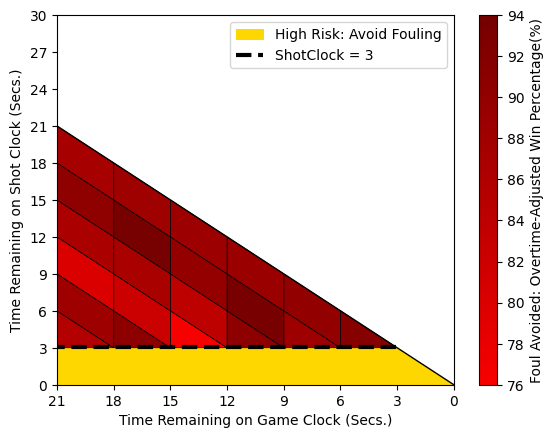

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
from matplotlib.colors import LinearSegmentedColormap

x = np.linspace(0, 22, 100)

ptmargin=3
bonustype = 'double'
maxx = 21
restype ='orig'
folder ='StudyCalculations'

#restype ='rep'
#folder ='ReproducedCalculations'

reg_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2010_results.csv')
reg_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2012_results.csv')
reg_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2014_results.csv')
reg_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2016_results.csv')
reg_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2017_results.csv')
reg_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2018_results.csv')
reg_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2020_results.csv')
lv_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2010_results.csv')
lv_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2012_results.csv')
lv_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2014_results.csv')
lv_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2016_results.csv')
lv_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2017_results.csv')
lv_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2018_results.csv')
lv_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2020_results.csv')


##This code chunk joins all the above datasets and calculates win percentages associated with each approach.
reg_results = pd.concat([reg_res_2010,reg_res_2012,reg_res_2014,
                         reg_res_2016,reg_res_2017,reg_res_2018,reg_res_2020],ignore_index=True)
lv_results = pd.concat([lv_res_2010,lv_res_2012,lv_res_2014,lv_res_2016,
                         lv_res_2017, lv_res_2018, lv_res_2020],ignore_index=True)
reg_results['idx']=reg_results.index
lv_results['idx']=lv_results.index
results = reg_results.join(lv_results,on='idx', rsuffix=" LV")
grouped = results.groupby(['Strategy']).sum()
grouped['Win% LVFoul'] = (100*grouped['Games Won Foul LV']) / grouped['Games Played Foul LV']
grouped['Win% NoLVFoul'] =(100*grouped['Games Won NoFoul LV']) / grouped['Games Played NoFoul LV']
grouped['Win% RegFoul'] = (100*grouped['Games Won Foul']) / grouped['Games Played Foul']
grouped['Win% NoFoul'] =(100*grouped['Games Won NoFoul']) / grouped['Games Played NoFoul']
grouped.reset_index(inplace=True)
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)

grouped['Polygon No.'] = grouped.index+1
grouped['Min (GC)'] = grouped['Min (GC)'].astype(int)
gc_df = pd.DataFrame({'GC Games Played Foul':grouped.groupby(['Min (GC)'])['Games Played Foul'].sum(), 'GC Games Won Foul':grouped.groupby(['Min (GC)'])['Games Won Foul'].sum()})
gc_df.reset_index(inplace=True)
gc_grouped = pd.merge(gc_df,grouped,on=['Min (GC)']).copy()
gc_grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
gc_grouped.reset_index(inplace=True)
gc_grouped['GC Interval Win% RegFoul'] = gc_grouped['GC Games Won Foul'] / gc_grouped['GC Games Played Foul']
gc_grouped['Foul Probability']=gc_grouped['Games Played Foul'] / (gc_grouped['Games Played Foul'] + gc_grouped['Games Played NoFoul'])
##This code chunk graphs the recommended approaches for each cell.
##It compares the overtime-adjusted win percentages across all fouling decisions and
##colors the plain grid according to the best approach in each cell.
##Red = NO FOUL, Green=Foul+LaneViolation, White=NotEnoughData
from matplotlib.patches import Polygon
next_wp_nofoul = 10000
fig, ax = plt.subplots()
a = np.arange(38, 48)
b = np.arange(38,48)
X, Y = np.meshgrid(a, b)
Z = X+Y
colors = [ (1.15-(.750**6), 0,0),(1.15-(.94**6), 0, 0)]  # R -> G -> B
cmap_name = 'cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
fig.colorbar(im, ax=ax,label='No Foul Was Committed: Overtime-Adjusted Win Percentage(%)')
im = ax.imshow(Z, origin='lower', cmap=cmap)
plt.clf()
fig, ax = plt.subplots()

#for idx, row in gc_grouped.iterrows():
#  plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],
#                 horizontalalignment='center',size=10)
for i in range(len(gc_grouped['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
              replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('w')
  wp_lvfoul = gc_grouped['Win% LVFoul'].values[i]
  wp_regfoul = gc_grouped['Win% RegFoul'].values[i]
  wp_nofoul = gc_grouped['Win% NoFoul'].values[i]
  gp_lvfoul = gc_grouped['Games Played Foul LV'].values[i]
  gp_regfoul = gc_grouped['Games Played Foul'].values[i]
  gp_nofoul = gc_grouped['Games Played NoFoul'].values[i]
  wp_regfoul_gclevel=((gc_grouped['GC Interval Win% RegFoul']-0.8)*9.8).values[i]
  foul_prob=gc_grouped['Foul Probability'].values[i]
  if gc_grouped['Min (SC)'].values[i] >=3:

    Polygon.set_color(poli,c=[1.15-(wp_nofoul/100)**6,0,0])
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_linestyle(poli,ls='-')
    Polygon.set_label(poli,s='')
  else:
    poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
                replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
    ax.set_facecolor('gold')
    Polygon.set_color(poli,c='gold')
    #Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.7)
    Polygon.set_label(poli,s="High Risk: Avoid Fouling")
  ax.add_patch(poli)
  ax.set_facecolor('w')
plt.plot(x+2.85,(x/x)+2.05,'k--',label="ShotClock = 3", linewidth=3,markersize=11)#
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.ylim(0,30)
plt.xlim(0,maxx)
plt.plot(x,x,'k', linewidth=1)


fig.colorbar(im, ax=ax,label='Foul Avoided: Overtime-Adjusted Win Percentage(%)')
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
ax=plt.gca() #inverts plot
ax.invert_xaxis()
plt.show()

## 9. Recommended Strategy (REGULARSIM)

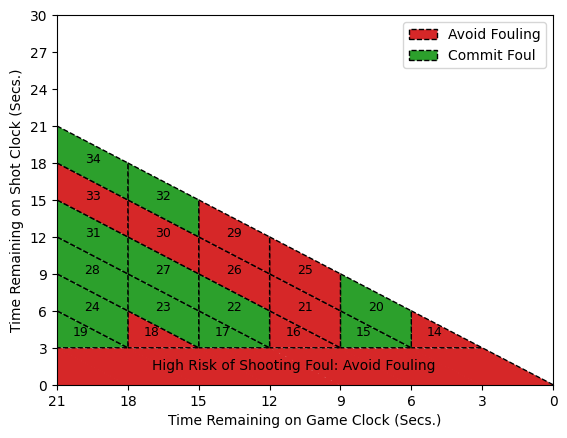

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle

ptmargin=3
bonustype = 'double'
maxx = 21
restype ='orig'
folder ='StudyCalculations'

#restype ='rep'
#folder ='ReproducedCalculations'


reg_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2010_results.csv')
reg_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2012_results.csv')
reg_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2014_results.csv')
reg_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2016_results.csv')
reg_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2017_results.csv')
reg_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2018_results.csv')
reg_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_reg_pbp_2020_results.csv')
lv_res_2010 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2010_results.csv')
lv_res_2012 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2012_results.csv')
lv_res_2014 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2014_results.csv')
lv_res_2016 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2016_results.csv')
lv_res_2017 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2017_results.csv')
lv_res_2018 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2018_results.csv')
lv_res_2020 = pd.read_csv('./Data/CellOTAdjustedWinPercentages/'+folder+'/'+restype+'_lv_pbp_2020_results.csv')


##This code chunk joins all the above datasets and calculates win percentages associated with each approach.
reg_results = pd.concat([reg_res_2010,reg_res_2012,reg_res_2014,
                         reg_res_2016,reg_res_2017,reg_res_2018,reg_res_2020],ignore_index=True)
lv_results = pd.concat([lv_res_2010,lv_res_2012,lv_res_2014,lv_res_2016,
                         lv_res_2017, lv_res_2018, lv_res_2020],ignore_index=True)
reg_results['idx']=reg_results.index
lv_results['idx']=lv_results.index
results = reg_results.join(lv_results,on='idx', rsuffix=" LV")
grouped = results.groupby(['Strategy']).sum()
grouped['Win% LVFoul'] = (100*grouped['Games Won Foul LV']) / grouped['Games Played Foul LV']
grouped['Win% NoLVFoul'] =(100*grouped['Games Won NoFoul LV']) / grouped['Games Played NoFoul LV']
grouped['Win% RegFoul'] = (100*grouped['Games Won Foul']) / grouped['Games Played Foul']
grouped['Win% NoFoul'] =(100*grouped['Games Won NoFoul']) / grouped['Games Played NoFoul']
grouped.reset_index(inplace=True)
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped['Min (GC)'] = [(eval(x).bounds[0]) for x in grouped['Strategy']]
grouped['Min (SC)'] = [(eval(x).bounds[1]) for x in grouped['Strategy']]
grouped['Centroid (SC)'] = [(eval(x).centroid.bounds[1]) for x in grouped['Strategy']]
grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
grouped.reset_index(inplace=True)

grouped['Polygon No.'] = grouped.index+1
grouped['CellID'] = ['', '', '', '', '', '', '', '', '', '', '', '', '',14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
grouped['Min (GC)'] = grouped['Min (GC)'].astype(int)
gc_df = pd.DataFrame({'GC Games Played Foul':grouped.groupby(['Min (GC)'])['Games Played Foul'].sum(), 'GC Games Won Foul':grouped.groupby(['Min (GC)'])['Games Won Foul'].sum()})
gc_df.reset_index(inplace=True)
gc_grouped = pd.merge(gc_df,grouped,on=['Min (GC)']).copy()
gc_grouped.sort_values(['Centroid (SC)','Min (GC)','Min (SC)',],ascending=[True,True,True],inplace=True)
gc_grouped.reset_index(inplace=True)
gc_grouped['GC Interval Win% RegFoul'] = gc_grouped['GC Games Won Foul'] / gc_grouped['GC Games Played Foul']
gc_grouped['Foul Probability']=gc_grouped['Games Played Foul'] / (gc_grouped['Games Played Foul'] + gc_grouped['Games Played NoFoul'])
##This code chunk graphs the recommended approaches for each cell.
##It compares the overtime-adjusted win percentages across all fouling decisions and
##colors the plain grid according to the best approach in each cell.
##Red = NO FOUL, Green=Foul+LaneViolation, White=NotEnoughData
from matplotlib.patches import Polygon
next_wp_nofoul = 10000
fig, ax = plt.subplots(1,1)
for idx, row in grouped.iterrows():
  plt.annotate(text=row['CellID'], xy=row['Centroid (GC,SC)'],
                 horizontalalignment='center',size=9)
for i in range(len(grouped.reset_index()['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').
              replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('w')
  wp_lvfoul = grouped['Win% LVFoul'].values[i]
  wp_regfoul = grouped['Win% RegFoul'].values[i]
  wp_nofoul = grouped['Win% NoFoul'].values[i]
  gp_lvfoul = grouped['Games Played Foul LV'].values[i]
  gp_regfoul = grouped['Games Played Foul'].values[i]
  gp_nofoul = grouped['Games Played NoFoul'].values[i]
  wp_regfoul_gclevel=100*gc_grouped['GC Interval Win% RegFoul'].values[i]

  if grouped['Min (SC)'][i]<3:
    Polygon.set_color(poli,c='tab:red')
    Polygon.set_edgecolor(poli,color='tab:red')
    Polygon.set_linewidth(poli,w=1)
    Polygon.set_linestyle(poli,'--')
    ax.add_patch(poli)
    Polygon.set_label(poli,s='Avoid Fouling')

  elif gp_nofoul <1:
    Polygon.set_color(poli,c='w')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=1)
    Polygon.set_linestyle(poli,'--')
    Polygon.set_label(poli,s='Not Enough Data')
    ax.add_patch(poli)
  elif wp_regfoul_gclevel>wp_nofoul:
    Polygon.set_color(poli,c='tab:green')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=1)
    Polygon.set_linestyle(poli,'--')
    ax.add_patch(poli)
    Polygon.set_label(poli,s='Commit Foul')
  elif (wp_nofoul> wp_regfoul_gclevel):
    Polygon.set_color(poli,c='tab:red')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=1)
    Polygon.set_linestyle(poli,'--')
    ax.add_patch(poli)
    Polygon.set_label(poli,s='Avoid Fouling')
  else:
    Polygon.set_color(poli,c='b')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=1)
    Polygon.set_linestyle(poli,'--')
    ax.add_patch(poli)
    Polygon.set_label(poli,s="Non Conclusive Result")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylim(0,30)
plt.xlim(0,maxx)
ax.set_xlabel('Time Remaining on Game Clock (Secs.)')
ax.set_ylabel('Time Remaining on Shot Clock (Secs.)')
plt.text(17, 1.2, 'High Risk of Shooting Foul: Avoid Fouling')
ax=plt.gca() #inverts plot
plt.xticks([0,3,6,9,12,15,18,21])
plt.yticks([0,3,6,9,12,15,18,21,24,27,30])
x = np.linspace(0, 3, 20)
plt.plot(x,x,'k--', linewidth=1)#=
ax.invert_xaxis()
plt.show()


## 10. Table: Breakdown of Recommended Strategy

In [14]:
gc_grouped['GC Interval Win% RegFoul'] = 100*gc_grouped['GC Games Won Foul'] / gc_grouped['GC Games Played Foul']
gc_grouped['GC Interval Win% RegFoul'] = gc_grouped['GC Interval Win% RegFoul'].round(2)
gc_grouped['Win% NoFoul'] = gc_grouped['Win% NoFoul'].round(2)
gc_grouped[['Polygon No.','GC Interval Win% RegFoul','Win% NoFoul','GC Games Won Foul','GC Games Played Foul','Games Won NoFoul','Games Played NoFoul']].tail(21)

,Polygon No.,GC Interval Win% RegFoul,Win% NoFoul,GC Games Won Foul,GC Games Played Foul,Games Won NoFoul,Games Played NoFoul
13,14,90.71,92.41,424.5,468,2666.0,2885
14,15,92.29,90.00,185.5,201,4.5,5
15,16,87.68,91.67,124.5,142,5.5,6
16,17,88.57,75.00,93.0,105,6.0,8
17,18,90.15,91.67,59.5,66,11.0,12
18,19,90.74,87.50,73.5,81,7.0,8
19,20,92.29,91.10,185.5,201,2606.5,2861
20,21,87.68,93.75,124.5,142,15.0,16
21,22,88.57,86.11,93.0,105,15.5,18
22,23,90.15,84.09,59.5,66,18.5,22
